**Name**: Ben Prescott

**Date**: 1/22/2021

**Assignment**: Assignment 1

# Load Libraries & Define Functions

In [1]:
#Loading required libraries 

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import os
import pickle
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression, RidgeClassifier
from sklearn.model_selection import StratifiedKFold      # 
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error, max_error, confusion_matrix
from sklearn.base import clone
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import SCORERS
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from scipy import stats #SciPy package to assist in using zscore to separate extreme outliers.
import scikitplot as skplt


In [141]:
# Function to clean and normalize a dataframe. Will be used later. Performs the following functions:
## Drops duplicates, remove rows with NaN values (small number)
## Changes Code column to object type (string)
## Removes outliers within zscore of 3
## Normalizes data
## Creates new dataframe with cleaned and scaled values

def clean_and_normalize(df):
    df.drop_duplicates(inplace=True)
    df.dropna(axis=0,how='any',inplace=True)
    df['Code'] = df['Code'].astype('str',copy=True)
    df = df[(np.abs(stats.zscore(df.iloc[:,3:])) < 3).all(axis=1)]
    df.reset_index(inplace=True, drop=True)
    # Commenting out the section for normalizing the data unless needed    
    dfvals = df.iloc[:,3:].values
    scaler = preprocessing.MinMaxScaler()
    scaled = scaler.fit_transform(dfvals)
    scdf = pd.DataFrame(scaled)
    df2 = pd.concat([df,scdf],axis=1)
    df2.drop(df2.columns[3:12],axis=1,inplace=True)
    df2.columns = df.columns
    return df2

# Import & Read Data

In [131]:
#Read pickle file and view first 5 rows
radonDF=pd.read_pickle(r'assign-1-radon-data.pickle')
radonDF.head()

,Code,State,County,Lung Cancer Mortality,Radon,Obesity,Age Over 65,Currently Smoke,Ever Smoke,Median HH Income,Mort Rank,Radon Rank
0,1001,AL,Autauga_County,97.0293,1.5,31.3,10.2,26.4,48.60,56.58,2523,1113.5
1,13103,GA,Effingham_County,94.4043,0.5,31.1,8.0,26.6,49.65,63.26,2409,270.5
2,13217,GA,Newton_County,91.8648,1.3,32.1,9.9,27.4,49.95,51.18,2281,974.5
3,13225,GA,Peach_County,93.6161,1.6,30.1,9.8,27.5,47.55,41.73,2366,1184.0
4,21077,KY,Gallatin_County,141.4099,0.6,30.9,10.3,27.9,54.60,47.68,2878,364.5


In [132]:
#View dataframe information and each column's summary stats
print(radonDF.info())
radonDF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Code                   2881 non-null   int64  
 1   State                  2881 non-null   object 
 2   County                 2881 non-null   object 
 3   Lung Cancer Mortality  2881 non-null   float64
 4   Radon                  2881 non-null   float64
 5   Obesity                2881 non-null   float64
 6   Age Over 65            2881 non-null   float64
 7   Currently Smoke        2881 non-null   float64
 8   Ever Smoke             2881 non-null   float64
 9   Median HH Income       2880 non-null   float64
 10  Mort Rank              2881 non-null   int64  
 11  Radon Rank             2881 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 270.2+ KB
None


,Code,Lung Cancer Mortality,Radon,Obesity,Age Over 65,Currently Smoke,Ever Smoke,Median HH Income,Mort Rank,Radon Rank
count,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2880.000000,2881.000000,2881.000000
mean,29879.143006,78.126974,3.082013,29.042798,14.814821,25.355745,49.932090,48.149885,1441.000000,1441.000000
std,14774.495273,17.650253,3.640046,3.727609,4.031764,4.809338,5.462211,11.929568,831.817388,831.639368
min,1001.000000,6.761900,0.000000,11.500000,3.000000,7.300000,25.650000,22.890000,1.000000,5.500000
25%,18171.000000,67.312800,1.000000,27.300000,12.200000,22.200000,46.600000,40.267500,721.000000,719.500000
50%,29061.000000,79.159500,2.100000,29.200000,14.400000,25.500000,50.450000,46.485000,1441.000000,1465.500000
75%,42051.000000,89.711200,4.000000,31.100000,17.100000,28.400000,53.650000,53.730000,2161.000000,2161.500000
max,56043.000000,205.746400,99.700000,43.900000,34.700000,40.900000,67.300000,125.900000,2881.000000,2881.000000


# Initial Visualization & Review

<Figure size 480x320 with 0 Axes>

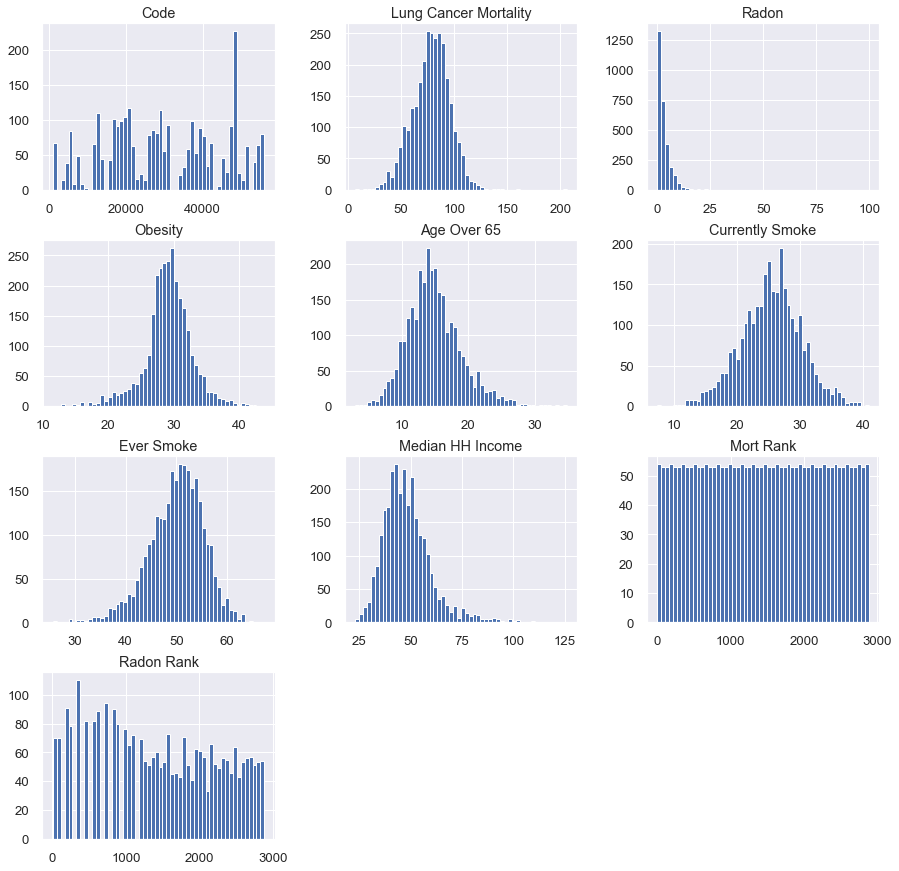

In [133]:
#Viewing histogram for each column
figure(num=None, dpi=80, facecolor='w', edgecolor='k')
bincount = int(round(np.sqrt(radonDF['Lung Cancer Mortality'].count())))
radonDF.hist(bins = bincount,figsize=(15,15))
plt.show()

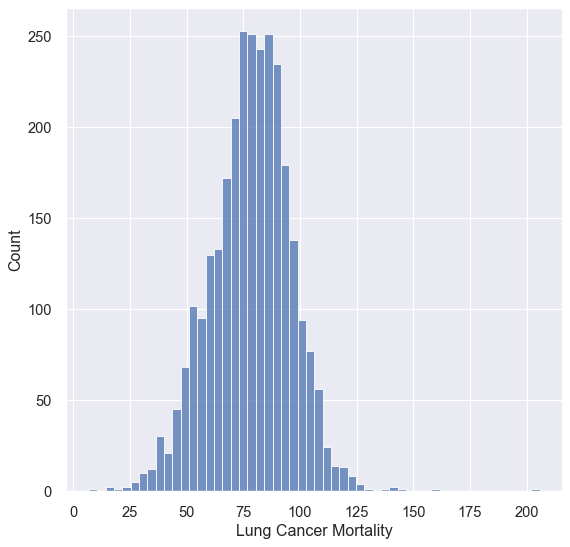

In [134]:
#Some potential outliers can be seen when increasing the size of the plot

figure(num=None, figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
bincount = int(round(np.sqrt(radonDF['Lung Cancer Mortality'].count())))
sns.histplot(radonDF['Lung Cancer Mortality'], bins = bincount)

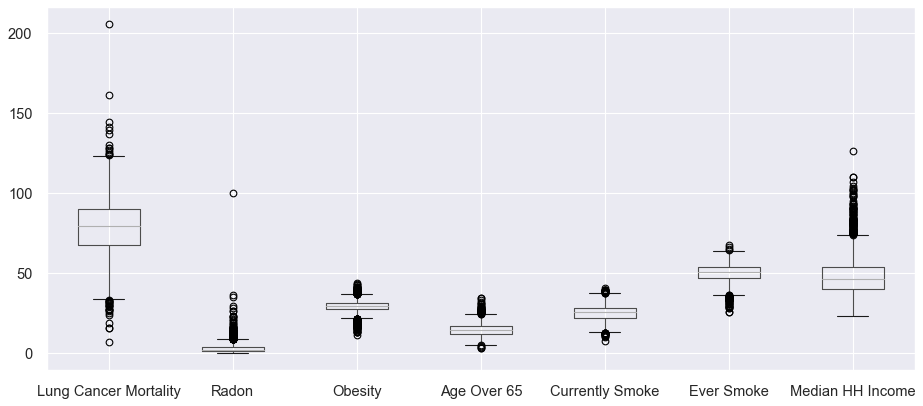

In [142]:
#Boxplot to view original dataframe outliers. 
#Some that look like extreme outliers can be seen.
figure(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
radonDF.iloc[:, 3:10].boxplot()

In [136]:
#Reviewing skew to determine if any values are heavily skewed. Radon is the worst.
#Also reviewing initial correlation matrix, sorted by lung cancer mortality.
print(radonDF.skew())
corr = radonDF.corr()
corr = corr.sort_values(by=['Lung Cancer Mortality'],ascending=False)
corr

Code                    -0.008340
Lung Cancer Mortality   -0.048973
Radon                    8.485467
Obesity                 -0.431950
Age Over 65              0.644795
Currently Smoke         -0.067711
Ever Smoke              -0.556990
Median HH Income         1.339536
Mort Rank                0.000000
Radon Rank               0.000991
dtype: float64


,Code,Lung Cancer Mortality,Radon,Obesity,Age Over 65,Currently Smoke,Ever Smoke,Median HH Income,Mort Rank,Radon Rank
Lung Cancer Mortality,-0.078423,1.000000,-0.306642,0.401948,-0.191148,0.561653,0.344672,-0.289640,0.964567,-0.425764
Mort Rank,-0.076938,0.964567,-0.325306,0.402830,-0.203919,0.552162,0.319670,-0.301378,1.000000,-0.448300
Currently Smoke,-0.046306,0.561653,-0.125965,0.466656,-0.077268,1.000000,0.722805,-0.519155,0.552162,-0.163439
Obesity,0.002392,0.401948,-0.185046,1.000000,-0.004855,0.466656,0.146270,-0.506193,0.402830,-0.275533
Ever Smoke,0.001627,0.344672,0.065564,0.146270,0.279120,0.722805,1.000000,-0.230779,0.319670,0.115783
Code,1.000000,-0.078423,0.006749,0.002392,0.032407,-0.046306,0.001627,0.081627,-0.076938,0.037284
Age Over 65,0.032407,-0.191148,0.098597,-0.004855,1.000000,-0.077268,0.279120,-0.259605,-0.203919,0.127271
Median HH Income,0.081627,-0.289640,0.192119,-0.506193,-0.259605,-0.519155,-0.230779,1.000000,-0.301378,0.270648
Radon,0.006749,-0.306642,1.000000,-0.185046,0.098597,-0.125965,0.065564,0.192119,-0.325306,0.717992
Radon Rank,0.037284,-0.425764,0.717992,-0.275533,0.127271,-0.163439,0.115783,0.270648,-0.448300,1.000000


# Data Cleaning

In [144]:
#Creating a copy of the original dataframe.
radonDF_clean = radonDF.copy()
radonDF_clean.head()

,Code,State,County,Lung Cancer Mortality,Radon,Obesity,Age Over 65,Currently Smoke,Ever Smoke,Median HH Income,Mort Rank,Radon Rank
0,1001,AL,Autauga_County,97.0293,1.5,31.3,10.2,26.4,48.60,56.58,2523,1113.5
1,13103,GA,Effingham_County,94.4043,0.5,31.1,8.0,26.6,49.65,63.26,2409,270.5
2,13217,GA,Newton_County,91.8648,1.3,32.1,9.9,27.4,49.95,51.18,2281,974.5
3,13225,GA,Peach_County,93.6161,1.6,30.1,9.8,27.5,47.55,41.73,2366,1184.0
4,21077,KY,Gallatin_County,141.4099,0.6,30.9,10.3,27.9,54.60,47.68,2878,364.5


In [145]:
#Sending copy of dataframe thruogh clean and normalize function.
#Reviewing cleaned dataframe's skew values and information.
radonDF_clean = clean_and_normalize(radonDF_clean)
print(radonDF_clean.skew(),'\n')
radonDF_clean.info()

Code                     0.002904
Lung Cancer Mortality   -0.195949
Radon                    1.552110
Obesity                 -0.192575
Age Over 65              0.476199
Currently Smoke          0.031820
Ever Smoke              -0.319852
Median HH Income         0.776699
Mort Rank               -0.037090
Radon Rank               0.004537
dtype: float64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707 entries, 0 to 2706
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Code                   2707 non-null   object 
 1   State                  2707 non-null   object 
 2   County                 2707 non-null   object 
 3   Lung Cancer Mortality  2707 non-null   float64
 4   Radon                  2707 non-null   float64
 5   Obesity                2707 non-null   float64
 6   Age Over 65            2707 non-null   float64
 7   Currently Smoke        2707 non-null   float64
 8   Ever Smoke 

In [150]:
#Creating a new column with values for each unique state.
#Might be used later to assist in prediction. TBD
radonDF_clean["StateEncod"] = radonDF_clean["State"].astype('category')
radonDF_clean["StateEncod"] = radonDF_clean["StateEncod"].cat.codes
radonDF_clean

,Code,State,County,Lung Cancer Mortality,Radon,Obesity,Age Over 65,Currently Smoke,Ever Smoke,Median HH Income,Mort Rank,Radon Rank,StateEncod
0,1001,AL,Autauga_County,0.681874,0.107143,0.599099,0.271930,0.520000,0.475120,0.544044,0.877224,0.389592,0
1,13103,GA,Effingham_County,0.656289,0.035714,0.590090,0.175439,0.527273,0.508828,0.655489,0.837461,0.093179,8
2,13217,GA,Newton_County,0.631537,0.092857,0.635135,0.258772,0.556364,0.518459,0.453954,0.792815,0.340717,8
3,13225,GA,Peach_County,0.648607,0.114286,0.545045,0.254386,0.560000,0.441413,0.296296,0.822463,0.414381,8
4,21151,KY,Madison_County,0.634524,0.150000,0.554054,0.254386,0.563636,0.486356,0.373207,0.796303,0.513361,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,8109,CO,Saguache_County,0.212827,0.100000,0.103604,0.298246,0.225455,0.032103,0.170838,0.050576,0.365506,4
2703,25007,MA,Dukes_County,0.465591,0.328571,0.004505,0.456140,0.054545,0.430177,0.675509,0.401116,0.799754,16
2704,37135,NC,Orange_County,0.495032,0.142857,0.189189,0.192982,0.120000,0.256822,0.627294,0.466690,0.494023,24
2705,49027,UT,Millard_County,0.000863,0.050000,0.130631,0.368421,0.192727,0.208668,0.471138,0.000349,0.159986,39


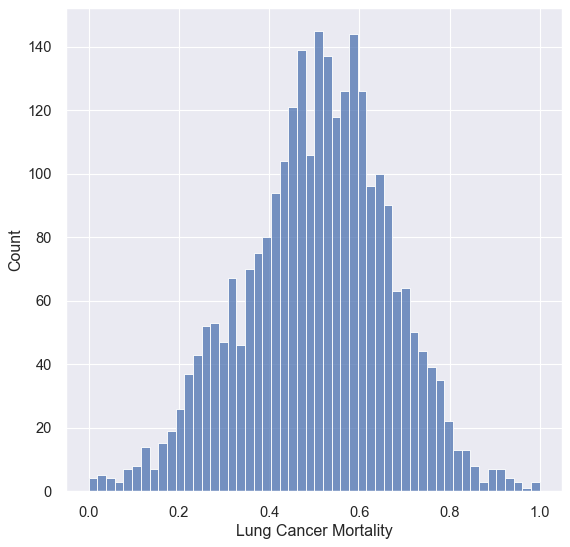

In [151]:
#Reviewing cleaned dataframe's lung cancer mortality histogram. 
#Skew, potential outliers and kurtosis is smaller.
figure(num=None, figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
bincount = int(round(np.sqrt(radonDF_clean['Lung Cancer Mortality'].count())))
sns.histplot(radonDF_clean['Lung Cancer Mortality'], bins = bincount)

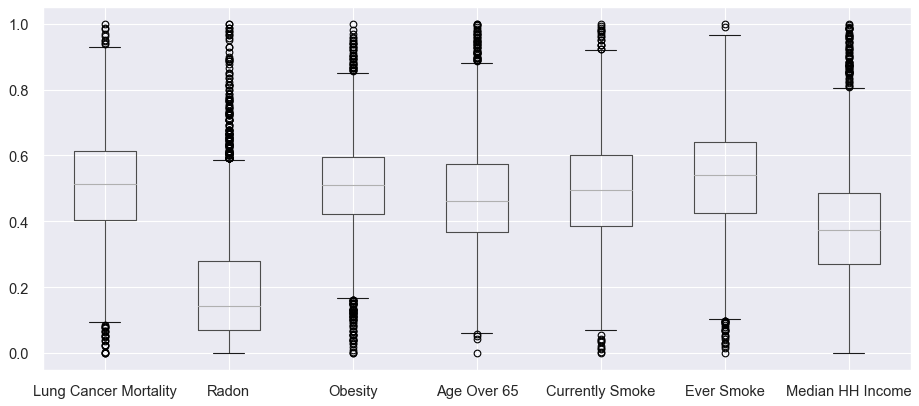

In [152]:
#Reviewing that outliers are not as extreme as before.
#This is likely a poor representation due to features being scaled.
figure(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
radonDF_clean.iloc[:, 3:10].boxplot()

## Reviewing Cleaned Data

In [153]:
#Reviewing cleaned data's correlation matrix.
#Initial review shows Mort Rank and Currently Smoke are the two with strongest correlations.
#Assumption is Mort Rank might cause overfitting.
corr = radonDF_clean.corr()
corr = corr.sort_values(by=['Lung Cancer Mortality'],ascending=False)
corr

,Lung Cancer Mortality,Radon,Obesity,Age Over 65,Currently Smoke,Ever Smoke,Median HH Income,Mort Rank,Radon Rank,StateEncod
Lung Cancer Mortality,1.000000,-0.395864,0.379899,-0.253557,0.551418,0.301454,-0.299266,0.977171,-0.438097,-0.091399
Mort Rank,0.977171,-0.407824,0.384446,-0.258810,0.541294,0.282906,-0.307208,1.000000,-0.452299,-0.089318
Currently Smoke,0.551418,-0.160566,0.434593,-0.118439,1.000000,0.709910,-0.493878,0.541294,-0.158503,-0.054079
Obesity,0.379899,-0.222083,1.000000,-0.063005,0.434593,0.106770,-0.457184,0.384446,-0.277016,-0.028694
Ever Smoke,0.301454,0.098806,0.106770,0.255906,0.709910,1.000000,-0.192479,0.282906,0.133384,0.004306
StateEncod,-0.091399,-0.020646,-0.028694,0.026484,-0.054079,0.004306,0.091697,-0.089318,0.017819,1.000000
Age Over 65,-0.253557,0.192320,-0.063005,1.000000,-0.118439,0.255906,-0.228212,-0.258810,0.167317,0.026484
Median HH Income,-0.299266,0.245112,-0.457184,-0.228212,-0.493878,-0.192479,1.000000,-0.307208,0.273377,0.091697
Radon,-0.395864,1.000000,-0.222083,0.192320,-0.160566,0.098806,0.245112,-0.407824,0.892053,-0.020646
Radon Rank,-0.438097,0.892053,-0.277016,0.167317,-0.158503,0.133384,0.273377,-0.452299,1.000000,0.017819


In [155]:
radonDF_clean.iloc[:,[4,5,6,7,8,11,12]]

,Radon,Obesity,Age Over 65,Currently Smoke,Ever Smoke,Radon Rank,StateEncod
0,0.107143,0.599099,0.271930,0.520000,0.475120,0.389592,0
1,0.035714,0.590090,0.175439,0.527273,0.508828,0.093179,8
2,0.092857,0.635135,0.258772,0.556364,0.518459,0.340717,8
3,0.114286,0.545045,0.254386,0.560000,0.441413,0.414381,8
4,0.150000,0.554054,0.254386,0.563636,0.486356,0.513361,14
...,...,...,...,...,...,...,...
2702,0.100000,0.103604,0.298246,0.225455,0.032103,0.365506,4
2703,0.328571,0.004505,0.456140,0.054545,0.430177,0.799754,16
2704,0.142857,0.189189,0.192982,0.120000,0.256822,0.494023,24
2705,0.050000,0.130631,0.368421,0.192727,0.208668,0.159986,39


# Model Training

## Linear Regression, Ridge Regression, Lasso Regression & Elastic Net

In [202]:
#Creating X and y variables for train/test split.
#Leveraging 7 features to aid in predicting, including encoded states.
y = radonDF_clean['Lung Cancer Mortality'].to_numpy(copy=True)
X = radonDF_clean.iloc[:,[4,5,6,7,8,11,12]].to_numpy(copy=True)

print(y.shape)
print(X.shape)

(2707,)
(2707, 7)


In [203]:
#Train/Test split. Using split of 70/30.

np.random.seed(66) #Setting random seed for reproducibility
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=50) #Train/Test split with 30% Test

In [160]:
#Loading and training Linear Regression model.
regMod = LinearRegression()
regMod.fit(Xtrain,ytrain)
print(f'Linear intercept estimate: {regMod.intercept_:5.3f}')
print(f'Linear estimated coefficients: {regMod.coef_[0]:5.3f}')

#Loading and training Ridge Regression model.
ridgeMod = Ridge(alpha=1, solver="cholesky")
ridgeMod.fit(X,y)
print(f'Ridge intercept estimate: {ridgeMod.intercept_:5.3f}')
print(f'Ridge estimated coefficients: {ridgeMod.coef_[0]:5.3f}')

#Loading and training Lasso Regression model.
lassoMod = Lasso(alpha=.001)
lassoMod.fit(X,y)
print(f'Lasso intercept estimate: {regMod.intercept_:5.3f}')
print(f'Lasso estimated coefficients: {regMod.coef_[0]:5.3f}')

#Loading and training Elastic Net model.
elasticMod = ElasticNet(alpha=0.001, l1_ratio=0.5)
elasticMod.fit(X,y)
print(f'ElasticNet intercept estimate: {regMod.intercept_:5.3f}')
print(f'ElasticNet estimated coefficients: {regMod.coef_[0]:5.3f}')

Linear intercept estimate: 0.385
Linear estimated coefficients: 0.014
Ridge intercept estimate: 0.411
Ridge estimated coefficients: 0.024
Lasso intercept estimate: 0.385
Lasso estimated coefficients: 0.014
ElasticNet intercept estimate: 0.385
ElasticNet estimated coefficients: 0.014


In [161]:
#Using Cross Validation to review linear regression generalization estimates.

linRegCV=cross_validate(clone(regMod),X, y, cv=10, return_train_score=True,
                       scoring=('r2','neg_mean_squared_error'))

print(f'Summary Across Folds')
pd.DataFrame(linRegCV).iloc[:,2:].describe()

Summary Across Folds


,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error
count,10.000000,10.000000,10.000000,10.000000
mean,0.252796,0.467833,-0.014491,-0.014022
std,0.136057,0.014776,0.002182,0.000228
min,-0.082017,0.439396,-0.018542,-0.014283
25%,0.218783,0.462687,-0.016047,-0.014239
50%,0.274794,0.469855,-0.014272,-0.014030
75%,0.332163,0.479597,-0.012464,-0.013852
max,0.390483,0.483560,-0.011978,-0.013615


## Regression Prediction & Performance

In [162]:
#Using each model to predict y values from Xtest.

ytestPred = regMod.predict(Xtest) #Linear Regression Prediction
ytestPredRidge = ridgeMod.predict(Xtest) #Ridge Regression Prediction
ytestPredLasso = lassoMod.predict(Xtest) #Lasso Regression Prediction
ytestPredElastic = elasticMod.predict(Xtest) #Elastic Net Prediction

In [163]:
#Linear Regression Evaluation
trainR2 = regMod.score(Xtrain,ytrain) #Training data R2 value
testR2 = r2_score(ytest,ytestPred) #Test data R2 value
testMSE = mean_squared_error(ytest, ytestPred, squared=False) #Root Mean Squared Error value
testMAX = max_error(ytest,ytestPred) #Maximum prediction error

#Ridge Regression Evaluation
trainR2Ridge = ridgeMod.score(Xtrain,ytrain) #Training data R2 value
testR2Ridge = r2_score(ytest,ytestPredRidge) #Test data R2 value
testMSERidge = mean_squared_error(ytest, ytestPredRidge, squared=True) #Root Mean Squared Error value
testMAXRidge = max_error(ytest,ytestPredRidge) #Maximum prediction error

#Lasso Regression Evaluation 
trainR2Lasso = lassoMod.score(Xtrain,ytrain) #Training data R2 value
testR2Lasso = r2_score(ytest,ytestPredLasso) #Test data R2 value
testMSELasso = mean_squared_error(ytest, ytestPredLasso, squared=True) #Root Mean Squared Error value
testMAXLasso = max_error(ytest,ytestPredLasso) #Maximum prediction error

#Elastic Net Evaluation
trainR2Elastic = elasticMod.score(Xtrain,ytrain) #Training data R2 value
testR2Elastic = r2_score(ytest,ytestPredElastic) #Test data R2 value
testMSEElastic = mean_squared_error(ytest, ytestPredElastic, squared=True) #Root Mean Squared Error value
testMAXElastic = max_error(ytest,ytestPredElastic) #Maximum prediction error

In [164]:
#Reviewing different model's metrics.

print(f'Linear Regression Metrics -- Training R\u00b2 = {trainR2:0.2f}, Test R\u00b2 = {testR2:0.2f}, MSE = {testMSE:0.2f}, Test Max Error = {testMAX:0.2f}')
print(f'Ridge Regression Metrics -- Training R\u00b2 = {trainR2Ridge:0.2f}, Test R\u00b2 = {testR2Ridge:0.2f}, MSE = {testMSERidge:0.2f}, Test Max Error = {testMAXRidge:0.2f}')
print(f'Lasso Regression Metrics -- Training R\u00b2 = {trainR2Lasso:0.2f}, Test R\u00b2 = {testR2Lasso:0.2f}, MSE = {testMSELasso:0.2f}, Test Max Error = {testMAXLasso:0.2f}')
print(f'Elastic Net Metrics -- Training R\u00b2 = {trainR2Elastic:0.2f}, Test R\u00b2 = {testR2Elastic:0.2f}, MSE = {testMSEElastic:0.2f}, Test Max Error = {testMAXElastic:0.2f}')

Linear Regression Metrics -- Training R² = 0.47, Test R² = 0.47, MSE = 0.12, Test Max Error = 0.55
Ridge Regression Metrics -- Training R² = 0.46, Test R² = 0.48, MSE = 0.01, Test Max Error = 0.53
Lasso Regression Metrics -- Training R² = 0.46, Test R² = 0.47, MSE = 0.01, Test Max Error = 0.53
Elastic Net Metrics -- Training R² = 0.46, Test R² = 0.47, MSE = 0.01, Test Max Error = 0.53


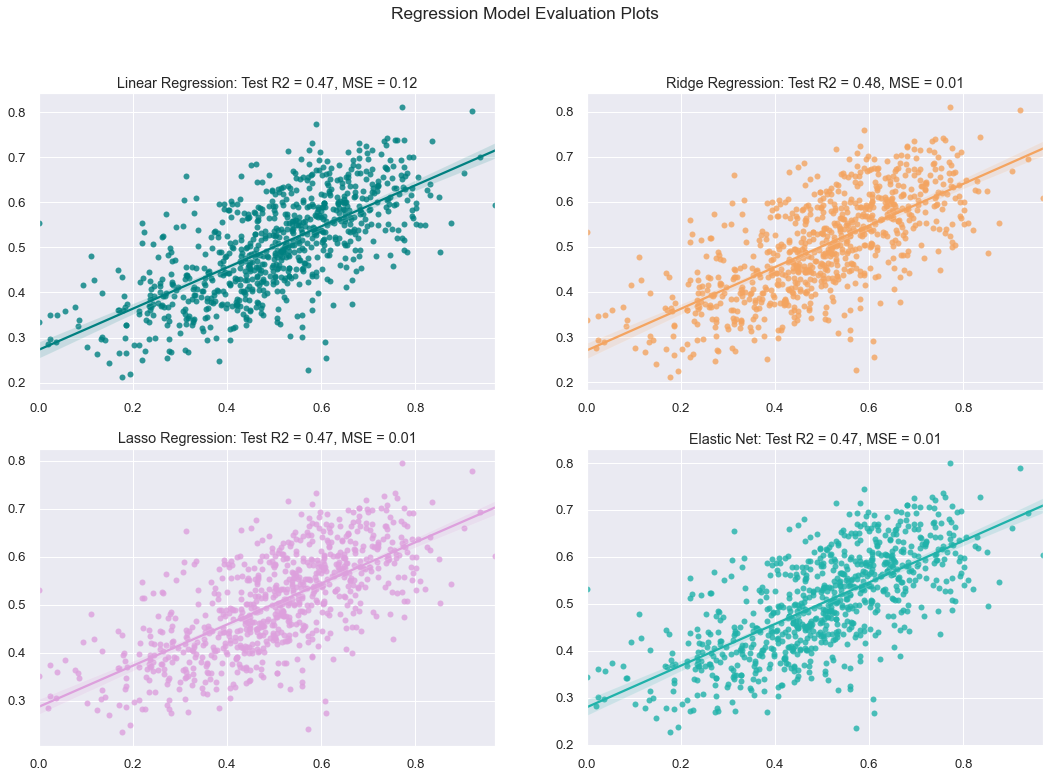

In [165]:
#Creating subplots of each regression model for visualization.
#All models seem to perform similarly, with a small benefit in Ridge Regression.
sns.set(font_scale=1.2)
fig, ax = plt.subplots(2, 2, figsize=(18,12))
fig.suptitle('Regression Model Evaluation Plots')
ax[0,0].set_title(f'Linear Regression: Test R2 = {testR2:0.2f}, MSE = {testMSE:0.2f}')
ax[0,1].set_title(f'Ridge Regression: Test R2 = {testR2Ridge:0.2f}, MSE = {testMSERidge:0.2f}')
ax[1,0].set_title(f'Lasso Regression: Test R2 = {testR2Lasso:0.2f}, MSE = {testMSELasso:0.2f}')
ax[1,1].set_title(f'Elastic Net: Test R2 = {testR2Elastic:0.2f}, MSE = {testMSEElastic:0.2f}')
sns.regplot(ax = ax[0,0], x=ytest, y=ytestPred, color="teal")
sns.regplot(ax = ax[0,1], x=ytest, y=ytestPredRidge, color="sandybrown")
sns.regplot(ax = ax[1,0], x=ytest, y=ytestPredLasso, color="plum")
sns.regplot(ax = ax[1,1], x=ytest, y=ytestPredElastic, color="lightseagreen")

## Basic Logistic Regression

In [191]:
#Creating a copy of the dataframe to use since we'll be adding a new column.
#Creating column HiRisk for classifying mortality 1 if over .64 (arbitrary number) and 0 if under. 
radonDF2_clean = radonDF_clean.copy()
radonDF2_clean['HiRisk'] = np.where(radonDF2_clean['Lung Cancer Mortality']>.64,1,0)

In [192]:
#Assigning the new HiRisk category to y.
#Assigning features for prediction to X.
y = radonDF2_clean['HiRisk'].to_numpy(copy=True)
X = radonDF2_clean[['Radon','Obesity','Currently Smoke']].to_numpy(copy=True) 
print(y.shape,X.shape)

(2707,) (2707, 3)


In [193]:
#Train/Test split. Using 80/20 split.
np.random.seed(67) #creating random seed for reproducibility
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=50)

In [194]:
#Loading Logistic Regression with L2 penalty and .0001 for regularization.
logReg = LogisticRegression(penalty="l2",n_jobs=-1,verbose=0, random_state=50, C=0.0001)

#Training the logistic regression model and predicting y values from Xtest.
logReg.fit(Xtrain,ytrain)
ypred = logReg.predict(Xtest)

#Reviewing score.
score = logReg.score(Xtest,ytest)
score

0.8007380073800738

In [195]:
# Using Kfold Cross Validation to determine how well the model may generalize. Scores all seem pretty consistent.

logRegCV=cross_validate(clone(logReg),X, y, cv=10, return_train_score=True,
                       scoring=('accuracy','roc_auc'))

print('Fold summary stats:')
pd.DataFrame(logRegCV).iloc[:,2:].describe()

Fold summary stats:


,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc
count,10.000000,10.000000,10.000000,10.000000
mean,0.801997,0.801995,0.798223,0.802195
std,0.001638,0.000182,0.171967,0.020587
min,0.800738,0.801724,0.515020,0.766078
25%,0.800738,0.801805,0.670998,0.796701
50%,0.800738,0.802135,0.829835,0.803963
75%,0.803704,0.802135,0.934879,0.817985
max,0.804428,0.802135,0.996957,0.829860


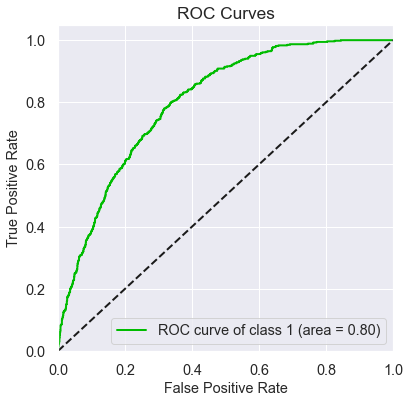

In [196]:
#Reviewing ROC curve and AUC
yp = logReg.predict_proba(X)
skplt.metrics.plot_roc(y, yp,
                       classes_to_plot=1,
                      plot_micro=False,
                      plot_macro=False,
                      figsize=(6,6)
                      )
plt.show();

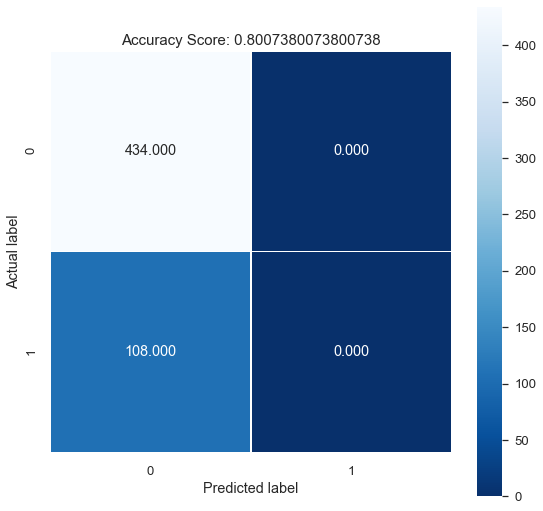

In [197]:
#Generating confusion matrix to determine number of predictions made correctly.
#434 were predicted correctly, 108 incorrectly.
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Ridge Classifier

In [198]:
#Ridge classifier likely not much different than logistic regression, due to data being scaled during pre-processing.

#Using Grid Search CV to assist in finding best parameters
parms = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],'normalize':[True,False],
         'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}  
ridReg=RidgeClassifier()
ridParmCV = GridSearchCV(ridReg,n_jobs=-1,verbose=0,
                    refit=True,
                    cv = 10,
                    scoring="accuracy",
                    return_train_score=True,
                    param_grid=parms
                     )
ridParmCV
ridParmFit = ridParmCV.fit(X,y)
ridParmFit.best_params_

{'alpha': 1.0, 'normalize': True, 'solver': 'auto'}

In [199]:
#Using best parameters from grid search output 
logRegRidge = RidgeClassifier(alpha=1,normalize=True, solver='auto').fit(X, y)

#Training ridge classifier & predicting values
logRegRidge.fit(Xtrain,ytrain)
pred = logRegRidge.predict(Xtest)

#Reviewing score
score = logRegRidge.score(Xtest,ytest)
score

0.8007380073800738

In [200]:
# Using cross validation to help estimate how the model will generalize 

ridRegCV=cross_validate(clone(logRegRidge),X, y, cv=10, return_train_score=True,
                       scoring=('accuracy','roc_auc'))

print(f'Fold summary stats:')
pd.DataFrame(ridRegCV).iloc[:,2:].describe()

Fold summary stats:


,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc
count,10.000000,10.000000,10.000000,10.000000
mean,0.801997,0.802241,0.796147,0.801530
std,0.001638,0.000524,0.177342,0.020602
min,0.800738,0.801724,0.503072,0.764998
25%,0.800738,0.801888,0.670016,0.795964
50%,0.800738,0.802135,0.827657,0.803843
75%,0.803704,0.802196,0.940134,0.817406
max,0.804428,0.803366,0.999391,0.828504


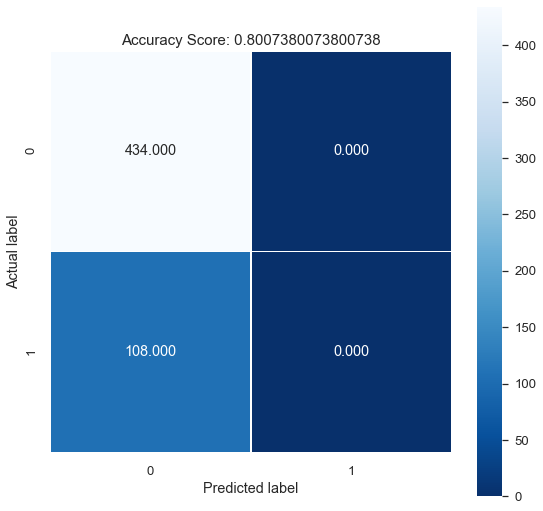

In [201]:
cm = confusion_matrix(ytest, pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);